In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Library for computing figures of interest for cpw structures
import ResonatorOptimizer as ro

plt.style.use('seaborn-deep')

In [3]:
# Global Parameters
__er = 11.9
__fo = 7.0e09
__h = 500e-06
__t = 50e-09
__pen_depth = 39e-09
# __total_width = 43.8e-06
# __total_width = 43.8e-06
__total_width_max = 100e-06
__length = 8102.64e-06

__keyind = lambda X,X_array: min(enumerate(X_array), key=lambda x: abs(x[1]-X))

In [4]:
wtot = np.arange(2,101,1)*1e-06
w = 2e-06
g = [.5*(wtot[i] - w) for i in range(len(wtot))]
l = __length
cpw = [ro.CPW(width=w, gap=g[i], length=l, elen=180, fo=__fo, er=__er, h=__h, t=__t, pen_depth=__pen_depth) for i in range(len(g))]

/Users/garethjones/anaconda3/lib/python3.6/site-packages/ResonatorOptimizer-0.1.0-py3.6.egg/ResonatorOptimizer/cpwcalcs/conformalmapping.py:52: RuntimeWarning: invalid value encountered in double_scalars


In [5]:
Z = [cpw[i].impedance_total() for i in range(1,len(g))]
Lki = [cpw[i].kinetic_inductance_per_length() for i in range(1,len(g))]
fo = [cpw[i].resonant_freq() for i in range(1,len(g))]
elen = [l / cpw[i].wavelength() for i in range(1,len(g))]
vp = [l / cpw[i].phase_velocity() for i in range(1,len(g))]

In [6]:
dic = {'TotalWidth':wtot[1:len(wtot)]*1e06, 
       'Z':Z, 
       'Lki':[Lki[i]*1e06 for i in range(len(Lki))],
       'fo':fo,
       'elen':elen,
       'vp':vp}
cpw_data = pd.DataFrame(data=dic)


val = cpw_data.TotalWidth[np.abs(cpw_data.TotalWidth - 80).idxmin()]
colors = ['red' if wtot  ==  val else 'steelblue' 
        for wtot in zip(cpw_data.TotalWidth)]

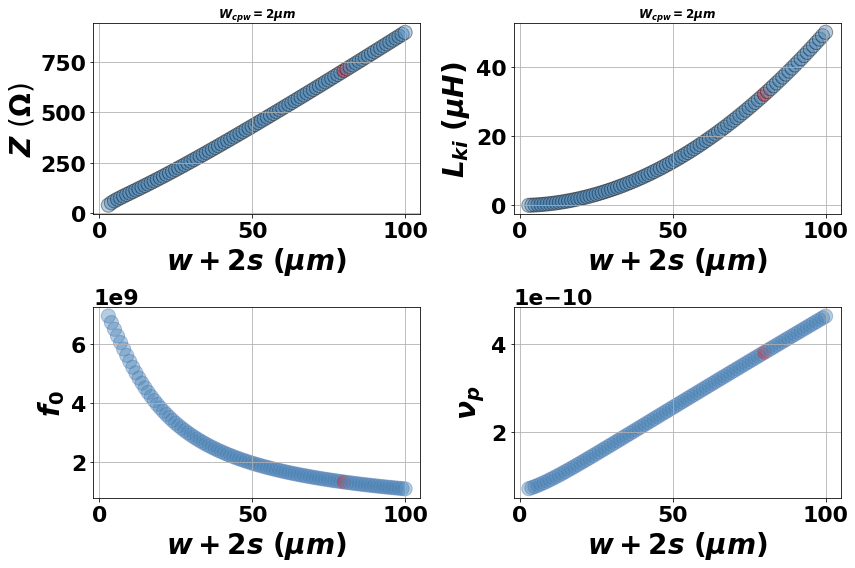

In [7]:
fig = plt.figure(figsize=(12,8))

ax0 = fig.add_subplot(221)
sns.regplot(x="TotalWidth", 
            y="Z", 
            data=cpw_data,
            fit_reg = False,
            scatter_kws = {'facecolors':colors,'s':200,'edgecolor':'k', 'alpha':.4})
ax0.grid()
ax0.set_title('$W_{cpw} = 2 \mu m$')
ax0.set_xlabel('$w + 2s$ $(\mu m)$')
ax0.set_ylabel('$Z$ ($\Omega$)')

ax1 = fig.add_subplot(222)
sns.regplot(x="TotalWidth", 
            y="Lki", 
            data=cpw_data,
            fit_reg = False,
            scatter_kws = {'facecolors':colors,'s':200,'edgecolor':'k', 'alpha':.4})
ax1.grid()
ax1.set_title('$W_{cpw} = 2 \mu m$')
ax1.set_xlabel('$w + 2s$ $(\mu m)$')
ax1.set_ylabel('$L_{ki}$ $(\mu H)$')

ax2 = fig.add_subplot(223)
sns.regplot(x="TotalWidth", 
            y="fo", 
            data=cpw_data,
            fit_reg = False,
            scatter_kws = {'facecolors':colors,'s':200, 'alpha':.4})
ax2.grid()
# ax2.set_title('$W_{cpw} = 2 \mu m$')
ax2.set_xlabel('$w + 2s$ $(\mu m)$')
ax2.set_ylabel('$f_{0}$')

ax3 = fig.add_subplot(224)
sns.regplot(x="TotalWidth", 
            y="vp", 
            data=cpw_data,
            fit_reg = False,
            scatter_kws = {'facecolors':colors,'s':200, 'alpha':.4})
ax3.grid()
# ax2.set_title('$W_{cpw} = 2 \mu m$')
ax3.set_xlabel('$w + 2s$ $(\mu m)$')
ax3.set_ylabel('$\\nu_{p}$')

plt.tight_layout()
plt.show()

# Sweep conductor width and total width

In [8]:
w = np.linspace(2e-06,100e-06,100)
wtot = [np.linspace(w[i],__total_width_max,100) for i in range(len(w))]

warray = np.repeat(w,np.shape(wtot)[1])
wtot_array = np.concatenate((([wtot[i] for i in range(np.shape(wtot)[0])])))
g = [.5*(wtot_array[i] - warray[i]) for i in range(len(warray))]

dic = {'w':np.round(warray,6),
      'TotalWidth':np.round(wtot_array,6),
      'g':g}
df = pd.DataFrame(data=dic)

cpw = [ro.CPW(width=warray[i], gap=g[i], length=l, elen=180, 
              fo=__fo, er=__er, h=__h, t=__t, pen_depth=__pen_depth) for i in range(len(warray))]

Z = [cpw[i].impedance_total() for i in range(len(cpw))]
Lki = [cpw[i].total_inductance_per_length() for i in range(len(cpw))]
fo = [cpw[i].resonant_freq() for i in range(len(cpw))]
vp = [cpw[i].phase_velocity() for i in range(len(cpw))]

df['Z'] = Z
df['Lki'] = Lki
df['fo'] = fo
df['vp'] = vp

df.TotalWidth = df.TotalWidth*1e06
df.Lki = df.Lki*1e06
df.fo = df.fo*1e-09

df = df.dropna()

/Users/garethjones/anaconda3/lib/python3.6/site-packages/ResonatorOptimizer-0.1.0-py3.6.egg/ResonatorOptimizer/cpwcalcs/conformalmapping.py:52: RuntimeWarning: invalid value encountered in double_scalars
/Users/garethjones/anaconda3/lib/python3.6/site-packages/ResonatorOptimizer-0.1.0-py3.6.egg/ResonatorOptimizer/cpwcalcs/conformalmapping.py:66: RuntimeWarning: divide by zero encountered in log
/Users/garethjones/anaconda3/lib/python3.6/site-packages/ResonatorOptimizer-0.1.0-py3.6.egg/ResonatorOptimizer/cpwcalcs/conformalmapping.py:68: RuntimeWarning: invalid value encountered in double_scalars


In [9]:
val_w = df.w[np.abs(df.w - 10e-06).idxmin()]
val_wt = df.TotalWidth[np.abs(df.TotalWidth - 80e-06).idxmin()]
colors = ['black' if w==val_w and wtot==val_wt else 'red' if w==val_w else 'steelblue'  
        for w,wtot in zip(df.w,df.TotalWidth)]

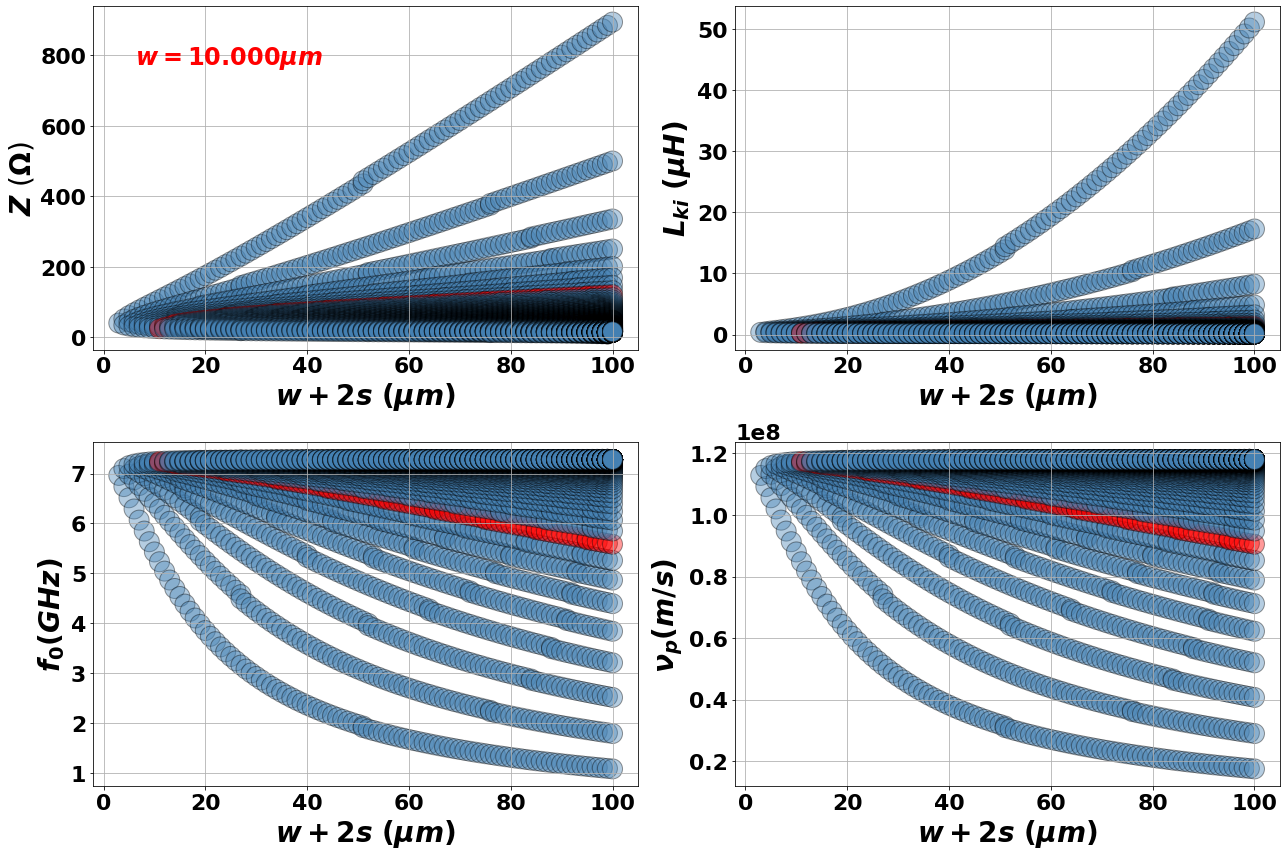

In [10]:
fig = plt.figure(figsize=(18,12))

ax0 = fig.add_subplot(221)
sns.regplot(x="TotalWidth", 
            y="Z",
            data=df,
            fit_reg = False,
            scatter_kws = {'facecolors':colors,'s':400,'edgecolor':'k', 'alpha':.4})
ax0.grid()
ax0.set_xlabel('$w + 2s$ $(\mu m)$')
ax0.set_ylabel('$Z$ ($\Omega$)')
ax0.text(.25,.85,'$w = {:.3f} \mu m$'.format(val_w*1e06),color='red',fontsize=24,horizontalalignment='center',
         verticalalignment='center', transform=ax0.transAxes)

ax1 = fig.add_subplot(222)
sns.regplot(x="TotalWidth", 
            y="Lki", 
            data=df,
            fit_reg = False,
            scatter_kws = {'facecolors':colors,'s':400,'edgecolor':'k', 'alpha':.4})
ax1.grid()
ax1.set_xlabel('$w + 2s$ $(\mu m)$')
ax1.set_ylabel('$L_{ki}$ $(\mu H)$')

ax2 = fig.add_subplot(223)
sns.regplot(x="TotalWidth", 
            y="fo", 
            data=df,
            fit_reg = False,
            scatter_kws = {'facecolors':colors,'s':400,'edgecolor':'k','alpha':.4})
ax2.grid()
# ax2.set_title('$W_{cpw} = 2 \mu m$')
ax2.set_xlabel('$w + 2s$ $(\mu m)$')
ax2.set_ylabel('$f_{0} (GHz)$')

ax3 = fig.add_subplot(224)
sns.regplot(x="TotalWidth", 
            y="vp", 
            data=df,
            fit_reg = False,
            scatter_kws = {'facecolors':colors,'s':400,'edgecolor':'k','alpha':.4})
ax3.grid()
ax3.set_xlabel('$w + 2s$ $(\mu m)$')
ax3.set_ylabel('$\\nu_{p} (m/s)$')

plt.tight_layout()
plt.savefig('/Users/garethjones/Documents/PhD_Files/QSD/Writing&Presentations/QuarterlyReviews/26-09-2019/Sweeps.pdf',bbox_inches=False)
plt.show()

## Choose a fixed total width

In [52]:
def choose_Z(df=df,Z=50,inp='TotalWidth',val=80e-06):
    return df.TotalWidth[np.where(df[inp]==val)[0]]
#     return (df.Z[np.abs(df.Z[np.where(df[inp]==val)[0]] - Z).idxmin()],
#             np.abs(df.Z[np.where(df[inp]==val)[0]] - Z).idxmin())
    
Zchosen = choose_Z(df=df,Z=50,inp='TotalWidth',val=80e-06)
Zchosen

pd.set_option('display.max_rows', 10000)
df.TotalWidth[np.where(df.TotalWidth==80e-06)[0]]

locw = np.where(df.w==29e-06)[0]
locwt = np.where(df.TotalWidth==8e-05)

locw
# df.loc[min(locr):max(locr)]

/Users/garethjones/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:1139: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


array([2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683,
       2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694,
       2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705,
       2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716,
       2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727,
       2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738,
       2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749,
       2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760,
       2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771])

In [53]:
locwt

(array([  78,  177,  275,  374,  473,  572,  670,  671,  769,  868,  967,
        1065, 1066, 1164, 1263, 1362, 1460, 1461, 1559, 1658, 1756, 1757,
        1855, 1954, 2053, 2151, 2250, 2349, 2447, 2546, 2644, 2645, 2743,
        2842, 2940, 2941, 3039, 3137, 3138, 3236, 3334, 3335, 3433, 3531,
        3532, 3630, 3631, 3728, 3729, 3827, 3828, 3925, 3926, 4024, 4122,
        4123, 4221, 4319, 4320, 4417, 4418, 4516, 4614, 4615, 4712, 4713,
        4810, 4811, 4908, 4909, 5007, 5008, 5105, 5106, 5203, 5204, 5301,
        5302, 5399, 5400, 5497, 5498, 5595, 5596, 5693, 5694, 5790, 5791,
        5792, 5888, 5889, 5890, 5986, 5987, 6084, 6085, 6181, 6182, 6183,
        6279, 6280, 6376, 6377, 6378, 6473, 6474, 6475, 6570, 6571, 6572,
        6667, 6668, 6669, 6670, 6764, 6765, 6766, 6767, 6861, 6862, 6863,
        6958, 6959, 6960, 7054, 7055, 7056, 7057, 7151, 7152, 7153, 7247,
        7248, 7249, 7342, 7343, 7344, 7345, 7438, 7439, 7440, 7441, 7533,
        7534, 7535, 7536, 7537, 7628, 

In [41]:
df.loc[2771]

w             2.900000e-05
TotalWidth    8.000000e-05
g             2.555739e-05
Z             5.967454e+01
Lki           5.138788e-07
fo            7.165919e+09
vp            1.161257e+08
Name: 2771, dtype: float64

In [17]:
df.loc[Zchosen[1]]

w             2.900000e-05
TotalWidth    6.000000e-05
g             1.547842e-05
Z             5.055680e+01
Lki           4.326747e-07
fo            7.210437e+09
vp            1.168471e+08
Name: 2743, dtype: float64

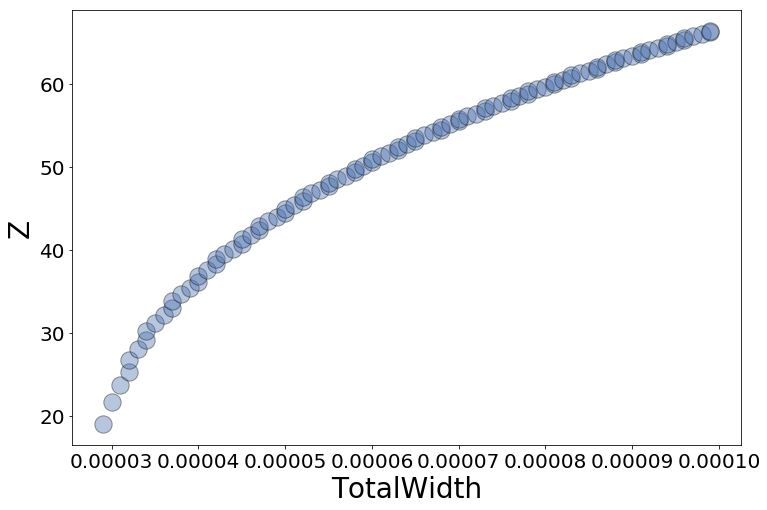

In [12]:
w_chosen = df.w[Zchosen[1]]
loc = np.where(df.w==w_chosen)[0]

plt.figure(figsize=(12,8))
sns.regplot(x="TotalWidth",
           y = "Z",
           data=df[min(loc):max(loc)],
           fit_reg=False,
           scatter_kws = {'edgecolor':'k','s':300, 'alpha':0.4})

plt.show()